In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from datetime import datetime
from pandas.stats.api import ols
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [123]:
df =pd.read_csv('data.csv')
array = np.asarray(df)

In [134]:
x = df.describe()

In [137]:
import pickle
with open('data.pickle','r') as f:
    data = pickle.load(f)

df = pd.DataFrame(data)
df_t = df.transpose()
print df_t.describe()

       android_avg_rating  android_file_size  android_rating_1  \
count        14810.000000       14810.000000      14810.000000   
mean             4.040074          55.912154     720337.732208   
std              0.177924          26.105101     229050.372204   
min              0.000000           0.000000          0.000000   
25%              4.000000          58.000000     627242.000000   
50%              4.100000          61.000000     752846.000000   
75%              4.100000          76.000000     909636.000000   
max              4.100000          77.000000     982631.000000   

       android_rating_2  android_rating_3  android_rating_4  android_rating_5  \
count      14810.000000      14810.000000      14810.000000      1.481000e+04   
mean      220940.611209     406204.605199     650649.112154      3.274879e+06   
std        62104.040636     120682.713630     203898.888126      1.091526e+06   
min            0.000000          0.000000          0.000000      0.000000e+00   


In [295]:
print df['Unnamed: 0'][0]

2016-07-21 00:00:00


In [26]:
df.describe()

,android_avg_rating,android_file_size,android_rating_1,android_rating_2,android_rating_3,android_rating_4,android_rating_5,android_total_ratings,ios_all_ratings,ios_current_ratings,ios_file_size
count,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,1.481000e+04,1.481000e+04,14810.000000,14810.000000,14810.000000
mean,4.046550,67.963606,720981.584267,221147.901958,406554.456111,651182.477583,3.277482e+06,5.277365e+06,202859.866036,7424.409858,196.718096
std,0.071877,8.209934,227578.490699,61577.562465,119814.578100,202622.936471,1.085615e+06,1.695682e+06,33352.105141,9107.281048,67.164680
min,3.900000,0.000000,199974.000000,71521.000000,117754.000000,165956.000000,7.265970e+05,1.281802e+06,106508.000000,29.000000,104.000000
25%,4.000000,61.000000,627242.000000,204299.000000,373913.000000,596010.000000,2.977746e+06,4.779210e+06,201533.000000,1865.000000,110.000000
50%,4.100000,61.000000,752846.000000,240452.000000,447650.000000,716201.000000,3.633064e+06,5.790213e+06,215355.000000,3676.000000,211.000000
75%,4.100000,77.000000,909636.000000,267621.000000,496153.000000,804331.000000,4.099775e+06,6.577516e+06,223336.000000,9609.000000,258.000000
max,4.100000,77.000000,982631.000000,285115.000000,528687.000000,856213.000000,4.352574e+06,7.005220e+06,230601.000000,46692.000000,260.000000


In [10]:
print df.columns

Index([u'Unnamed: 0', u'android_avg_rating', u'android_file_size',
       u'android_rating_1', u'android_rating_2', u'android_rating_3',
       u'android_rating_4', u'android_rating_5', u'android_total_ratings',
       u'ios_all_ratings', u'ios_current_ratings', u'ios_file_size'],
      dtype='object')


In [3]:
lst = df[u'Unnamed: 0']

In [4]:
dates = []
for a in lst:
    dates.append(datetime.strptime(a, "%Y-%m-%d %H:%M:%S"))

In [5]:
time = []
for date in dates:
    time.append(((date- dates[0]).total_seconds())/60)
p_time = ((datetime.strptime('2016/11/01 23:50:00', "%Y/%m/%d %H:%M:%S") - dates[0]).total_seconds())/60

In [6]:
print p_time, time[-1]

149750.0 148310.0


In [119]:
col = df.copy()
col.drop(labels=['android_total_ratings'], axis=1, inplace=True)

col.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
col.drop(labels=['android_file_size'], axis=1, inplace=True)
col.drop(labels=['android_avg_rating'], axis=1, inplace=True)
#col.drop(labels=['android_rating_1'], axis=1, inplace=True)
#col.drop(labels=['android_rating_2'], axis=1, inplace=True)
#col.drop(labels=['android_rating_3'], axis=1, inplace=True)
#col.drop(labels=['android_rating_4'], axis=1, inplace=True)
#col.drop(labels=['android_rating_5'], axis=1, inplace=True)
col.drop(labels=['ios_all_ratings'], axis=1, inplace=True)
#col.drop(labels=['ios_current_ratings'], axis=1, inplace=True)
col.drop(labels=['ios_file_size'], axis=1, inplace=True)

y = df['ios_all_ratings']

col.insert(loc=0, column='Time', value=time)
col.head()

,Time,android_rating_1,android_rating_2,android_rating_3,android_rating_4,android_rating_5,ios_current_ratings
0,0.0,199974,71521,117754,165956,726597,4688
1,10.0,199974,71521,117754,165956,726597,4688
2,20.0,199974,71521,117754,165956,726597,4688
3,30.0,199974,71521,117754,165956,726597,4688
4,40.0,199974,71521,117754,165956,726597,4688


In [75]:

X, y = col, df['android_total_ratings']
X.shape
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


NameError: name 'LinearSVC' is not defined

In [126]:
from sklearn.cross_validation import train_test_split

In [133]:
#X_train,X_test,y_train,y_test = train_test_split(np.asarray(time).reshape(-1,1),np.asarray(df['android_total_ratings']),test_size=0.2)

In [194]:
X_train,X_test,y_train,y_test = train_test_split(col,np.asarray(df['android_total_ratings']),test_size=0.2)

In [174]:
#X = np.asarray(time) 
#y = np.asarray(df['android_total_ratings'])


0.999957828602


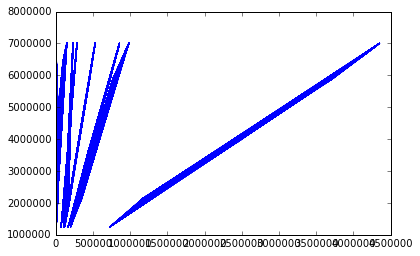

In [197]:
from sklearn.linear_model import Ridge
ridgereg = Ridge()
ridgereg.fit(X_train,y_train)
print ridgereg.score(X_train,y_train)
y_pred = ridgereg.predict(X_train)
plt.plot(X_train, ridgereg.predict(X_train), 'b', label=u'ŷ (alpha=0.0)')
plt.show()

-6.7856621931
-82253330.4465
[ 230028.7703823]


C:\Users\binoy\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


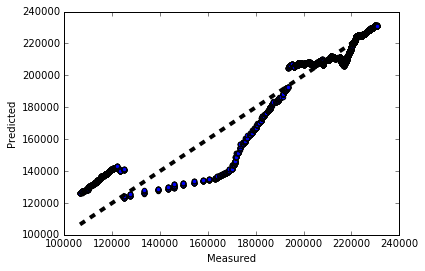

In [121]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import  cross_val_score, cross_val_predict
model = Ridge(alpha = 1)
scoring1 = 'r2'

results_r2 = cross_val_score(model, col, y, cv=10, scoring=scoring1)
predicted = cross_val_predict(model, col, y, cv=10)
print results_r2.mean()
scoring2 = 'mean_squared_error'
results_mse = cross_val_score(model, col, y, cv=10, scoring=scoring2)
print results_mse.mean()
lst = col.tail(1)
lst['Time'] = p_time
model.fit(col,y)
pred = model.predict(lst)
print pred
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()




-23.6201038697
-158590307.766


C:\Users\binoy\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 225734.28462993]


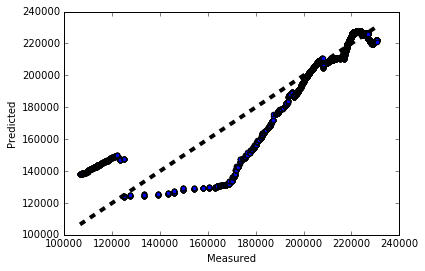

In [118]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import  cross_val_score, cross_val_predict
model = Lasso(alpha = 0.001, normalize = True)
scoring1 = 'r2'
results_r2 = cross_val_score(model, col, y, cv=10, scoring=scoring1)
predicted = cross_val_predict(model, col, y, cv=10)
print results_r2.mean()
scoring2 = 'mean_squared_error'
results_mse = cross_val_score(model, col, y, cv=10, scoring=scoring2)
print results_mse.mean()
lst = col.tail(1)
lst['Time'] = p_time
model.fit(col,y)
pred = model.predict(lst)
print pred
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

-9.75592255516
-193263084.64


C:\Users\binoy\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 228943.54395738]


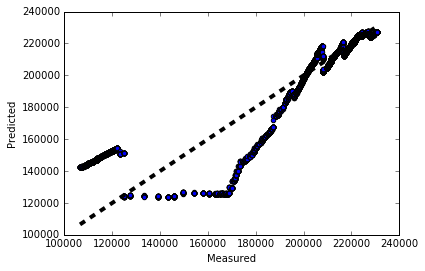

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import  cross_val_score, cross_val_predict
model = LinearRegression()
scoring1 = 'r2'
results_r2 = cross_val_score(model, col, y, cv=10, scoring=scoring1)
predicted = cross_val_predict(model, col, y, cv=10)
print results_r2.mean()
scoring2 = 'mean_squared_error'
results_mse = cross_val_score(model, col, y, cv=10, scoring=scoring2)
print results_mse.mean()
lst = col.tail(1)
lst['Time'] = p_time
model.fit(col,y)
pred = model.predict(lst)
print pred
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [201]:
import sklearn
print(sklearn.__version__)

0.17.1


-10.3055207011
-190156185.244
[ 228364.25508507]


C:\Users\binoy\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


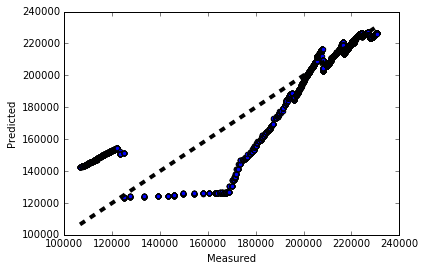

In [99]:
from sklearn.cross_validation import  cross_val_score
from sklearn.linear_model import ElasticNet

seed =7
model = ElasticNet(alpha =1000,fit_intercept= True,l1_ratio=0.7)
scoring1 = 'r2'
results_r2 = cross_val_score(model, col, y, cv=10, scoring=scoring1)
predicted = cross_val_predict(model, col, y, cv=10)
print results_r2.mean()
scoring2 = 'mean_squared_error'
results_mse = cross_val_score(model, col, y, cv=10, scoring=scoring2)
print results_mse.mean()
lst = col.tail(1)
lst['Time'] = p_time
model.fit(col,y)
pred = model.predict(lst)
print pred
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [84]:
print('Variance score: %.2f' % ridgereg.score(X_train, y_train))

NameError: name 'ridgereg' is not defined

In [179]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
print('Variance score: %.2f' % model.score(X_test, y_test))

Variance score: 1.00


In [21]:
import matplotlib.pyplot as plt


In [181]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: x and y must be the same size